In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv("heart_data.csv")

In [ ]:
df.head()

,rest_bp,chest_pain,thalassemia,age,fasting_bs,max_hr,exercise_angina,gender,st_slope,cholesterol,st_depression,rest_ecg,num_vessels,diagnosis
0,106,3,0,67,0,142,0,0,0,223,0.3,0,2,0
1,120,2,0,50,0,158,0,0,1,219,1.6,0,0,0
2,126,3,2,35,0,156,1,1,0,282,0.0,2,0,1
3,150,3,2,63,0,154,0,0,1,407,4.0,2,3,1
4,140,3,2,46,0,120,1,1,1,311,1.8,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rest_bp          297 non-null    int64  
 1   chest_pain       297 non-null    int64  
 2   thalassemia      297 non-null    int64  
 3   age              297 non-null    int64  
 4   fasting_bs       297 non-null    int64  
 5   max_hr           297 non-null    int64  
 6   exercise_angina  297 non-null    int64  
 7   gender           297 non-null    int64  
 8   st_slope         297 non-null    int64  
 9   cholesterol      297 non-null    int64  
 10  st_depression    297 non-null    float64
 11  rest_ecg         297 non-null    int64  
 12  num_vessels      297 non-null    int64  
 13  diagnosis        297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [ ]:
df.describe()

,rest_bp,chest_pain,thalassemia,age,fasting_bs,max_hr,exercise_angina,gender,st_slope,cholesterol,st_depression,rest_ecg,num_vessels,diagnosis
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,131.693603,2.158249,0.835017,54.542088,0.144781,149.599327,0.326599,0.676768,0.602694,247.350168,1.055556,0.996633,0.676768,0.461279
std,17.762806,0.964859,0.956690,9.049736,0.352474,22.941562,0.469761,0.468500,0.618187,51.997583,1.166123,0.994914,0.938965,0.499340
min,94.000000,0.000000,0.000000,29.000000,0.000000,71.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,2.000000,0.000000,48.000000,0.000000,133.000000,0.000000,0.000000,0.000000,211.000000,0.000000,0.000000,0.000000,0.000000
50%,130.000000,2.000000,0.000000,56.000000,0.000000,153.000000,0.000000,1.000000,1.000000,243.000000,0.800000,1.000000,0.000000,0.000000
75%,140.000000,3.000000,2.000000,61.000000,0.000000,166.000000,1.000000,1.000000,1.000000,276.000000,1.600000,2.000000,1.000000,1.000000
max,200.000000,3.000000,2.000000,77.000000,1.000000,202.000000,1.000000,1.000000,2.000000,564.000000,6.200000,2.000000,3.000000,1.000000


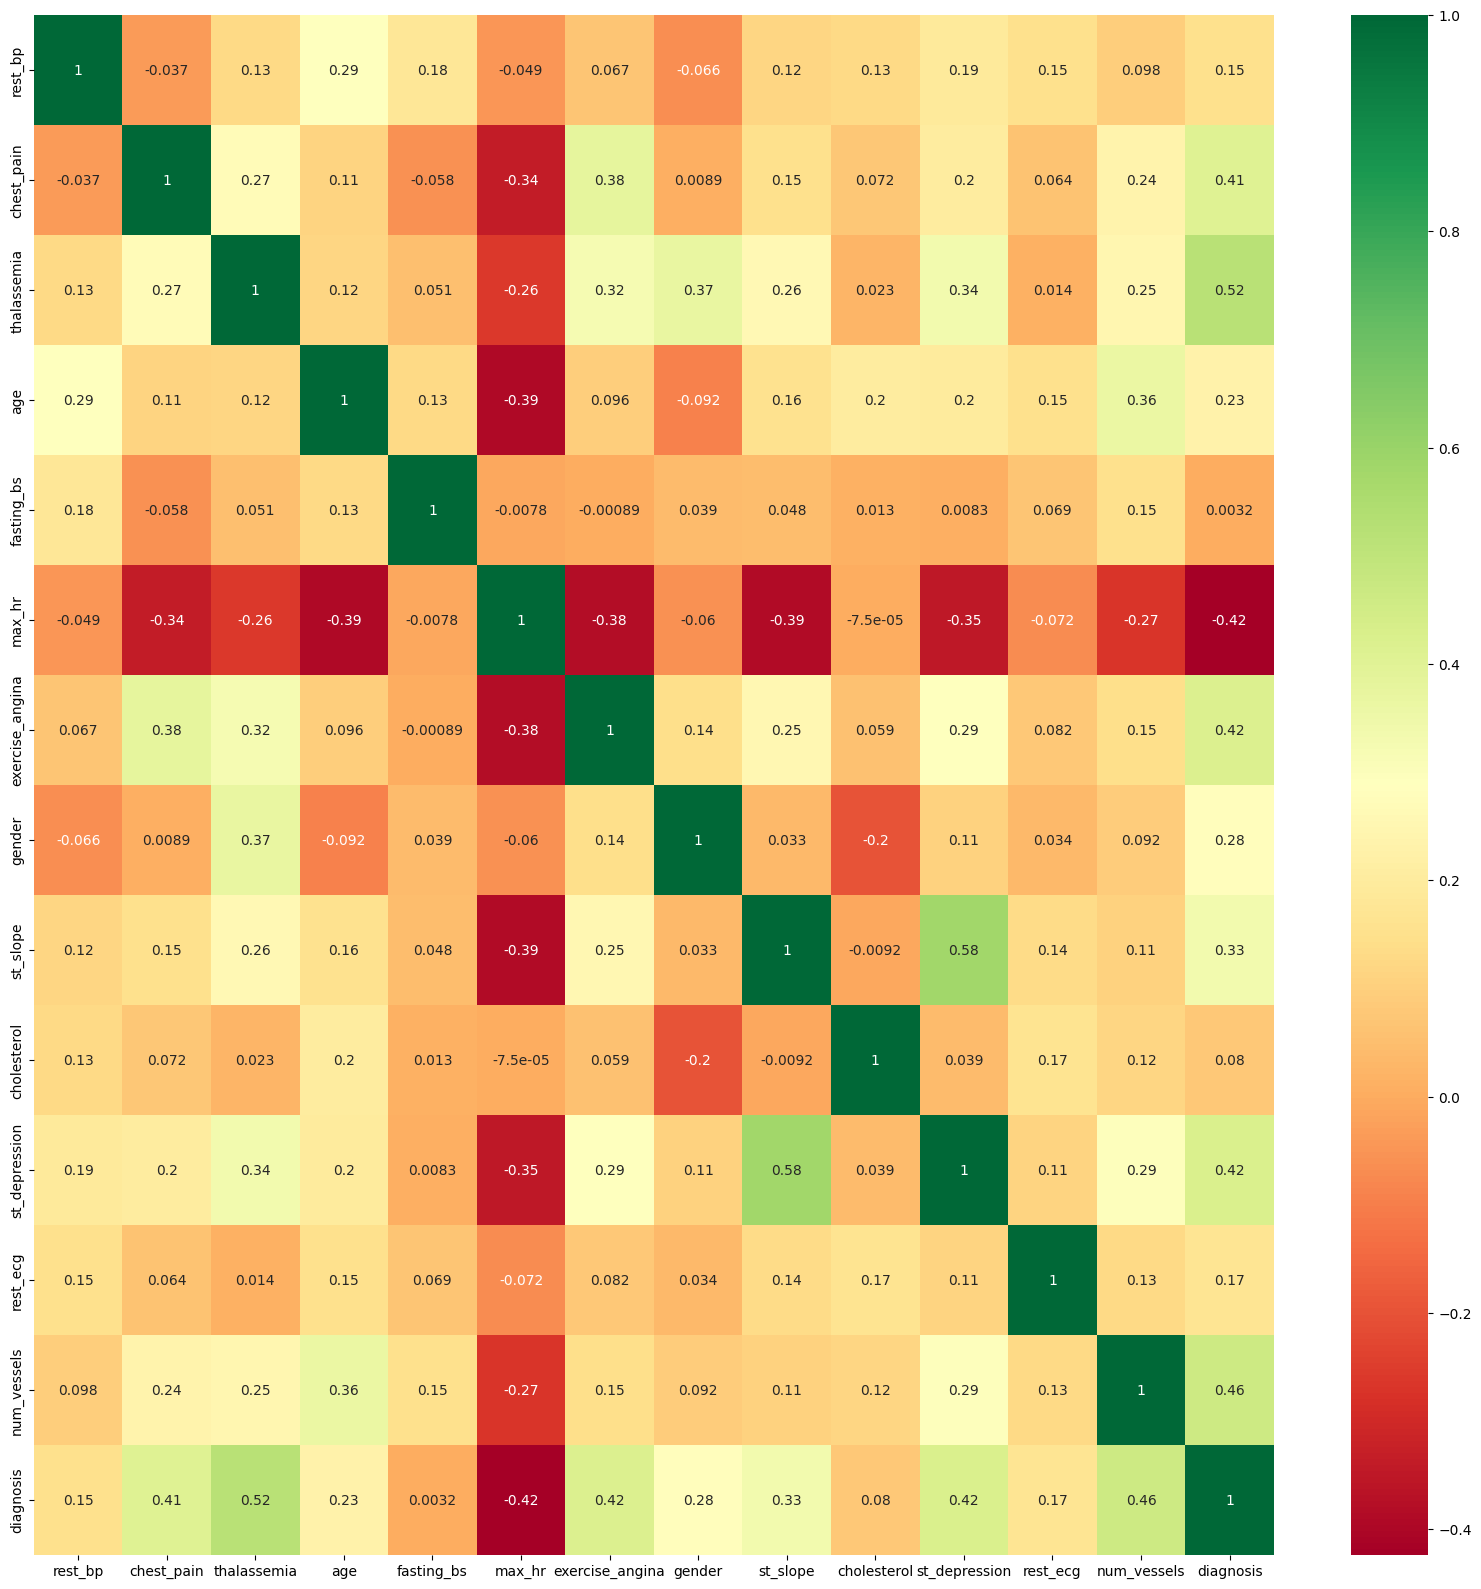

In [ ]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<Axes: title={'center': 'rest_bp'}>,
        <Axes: title={'center': 'chest_pain'}>,
        <Axes: title={'center': 'thalassemia'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'fasting_bs'}>,
        <Axes: title={'center': 'max_hr'}>,
        <Axes: title={'center': 'exercise_angina'}>,
        <Axes: title={'center': 'gender'}>],
       [<Axes: title={'center': 'st_slope'}>,
        <Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'st_depression'}>,
        <Axes: title={'center': 'rest_ecg'}>],
       [<Axes: title={'center': 'num_vessels'}>,
        <Axes: title={'center': 'diagnosis'}>, <Axes: >, <Axes: >]],
      dtype=object)

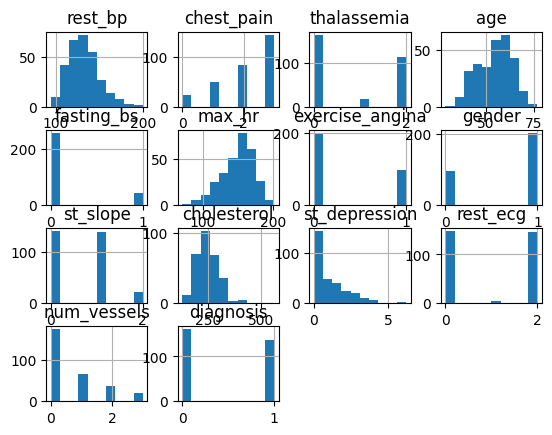

In [ ]:
df.hist()

<Axes: xlabel='diagnosis', ylabel='count'>

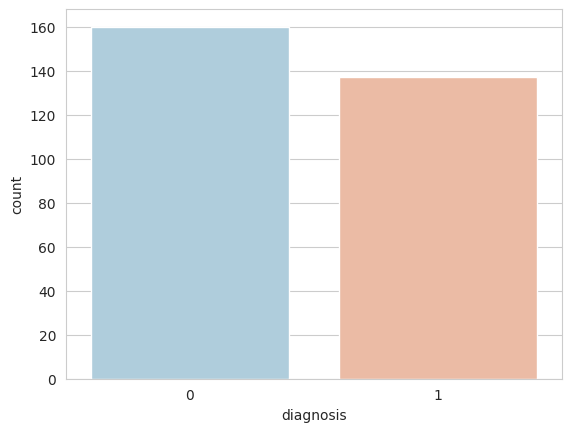

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='diagnosis', data=df,palette='RdBu_r')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()


In [ ]:
obj_padronizacao = StandardScaler().fit(df)

In [ ]:
df_padronizado = obj_padronizacao.transform(df)

In [ ]:
df_padronizado

array([[-1.44892462,  0.87388018, -0.87429153, ..., -1.00341866,
         1.41162482, -0.92533778],
       [-0.65943064, -0.16428947, -0.87429153, ..., -1.00341866,
        -0.72197605, -0.92533778],
       [-0.32107608,  0.87388018,  1.21977769, ...,  1.01019851,
        -0.72197605,  1.08068645],
       ...,
       [ 0.35563305,  0.87388018, -0.87429153, ...,  1.01019851,
        -0.72197605, -0.92533778],
       [-0.09550637,  0.87388018,  1.21977769, ...,  1.01019851,
        -0.72197605,  1.08068645],
       [ 1.03234218,  0.87388018,  1.21977769, ...,  1.01019851,
        -0.72197605,  1.08068645]])

In [ ]:

df_padronizado = pd.DataFrame(df_padronizado)
df_padronizado.columns = ['rest_bp', 'chest_pain', 'thalassemia', 'age', 'fasting_bs', 'max_hr', 'exercise_angina', 'gender', 'st_slope', 'cholesterol', 'st_depression', 'rest_ecg', 'num_vessels', 'diagnosis']


In [ ]:

df_padronizado.head()

,rest_bp,chest_pain,thalassemia,age,fasting_bs,max_hr,exercise_angina,gender,st_slope,cholesterol,st_depression,rest_ecg,num_vessels,diagnosis
0,-1.448925,0.873880,-0.874292,1.378929,-0.41145,-0.331806,-0.696419,-1.446980,-0.976583,-0.469085,-0.649015,-1.003419,1.411625,-0.925338
1,-0.659431,-0.164289,-0.874292,-0.502750,-0.41145,0.366795,-0.696419,-1.446980,0.643781,-0.546141,0.467672,-1.003419,-0.721976,-0.925338
2,-0.321076,0.873880,1.219778,-2.163054,-0.41145,0.279470,1.435916,0.691095,-0.976583,0.667499,-0.906712,1.010199,-0.721976,1.080686
3,1.032342,0.873880,1.219778,0.936181,-0.41145,0.192145,-0.696419,-1.446980,0.643781,3.075514,2.529248,1.010199,2.478425,1.080686
4,0.468418,0.873880,1.219778,-0.945498,-0.41145,-1.292383,1.435916,0.691095,0.643781,1.226158,0.639470,-1.003419,1.411625,1.080686


In [ ]:
from sklearn.preprocessing import MinMaxScaler

obj_normalizacao = MinMaxScaler().fit(df)



In [ ]:
df_normalizado = obj_normalizacao.transform(df)

In [ ]:
df_normalizado

array([[0.11320755, 1.        , 0.        , ..., 0.        , 0.66666667,
        0.        ],
       [0.24528302, 0.66666667, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.30188679, 1.        , 1.        , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.41509434, 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.33962264, 1.        , 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.52830189, 1.        , 1.        , ..., 1.        , 0.        ,
        1.        ]])

In [ ]:
df_normalizado = pd.DataFrame(df_normalizado)
df_normalizado.columns = ['rest_bp', 'chest_pain', 'thalassemia', 'age', 'fasting_bs', 'max_hr', 'exercise_angina', 'gender', 'st_slope', 'cholesterol', 'st_depression', 'rest_ecg', 'num_vessels', 'diagnosis']

In [ ]:
df_normalizado.head()

,rest_bp,chest_pain,thalassemia,age,fasting_bs,max_hr,exercise_angina,gender,st_slope,cholesterol,st_depression,rest_ecg,num_vessels,diagnosis
0,0.113208,1.000000,0.0,0.791667,0.0,0.541985,0.0,0.0,0.0,0.221461,0.048387,0.0,0.666667,0.0
1,0.245283,0.666667,0.0,0.437500,0.0,0.664122,0.0,0.0,0.5,0.212329,0.258065,0.0,0.000000,0.0
2,0.301887,1.000000,1.0,0.125000,0.0,0.648855,1.0,1.0,0.0,0.356164,0.000000,1.0,0.000000,1.0
3,0.528302,1.000000,1.0,0.708333,0.0,0.633588,0.0,0.0,0.5,0.641553,0.645161,1.0,1.000000,1.0
4,0.433962,1.000000,1.0,0.354167,0.0,0.374046,1.0,1.0,0.5,0.422374,0.290323,0.0,0.666667,1.0


In [ ]:
y = df_normalizado['diagnosis']
X = df_normalizado.drop(['diagnosis'], axis = 1)

In [ ]:
from sklearn.model_selection import cross_val_score

knn_scores = []

for k in range(1, 14):
  knn_classifier = KNeighborsClassifier(n_neighbors = k)
  score=cross_val_score(knn_classifier,X,y,cv=10)
  knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

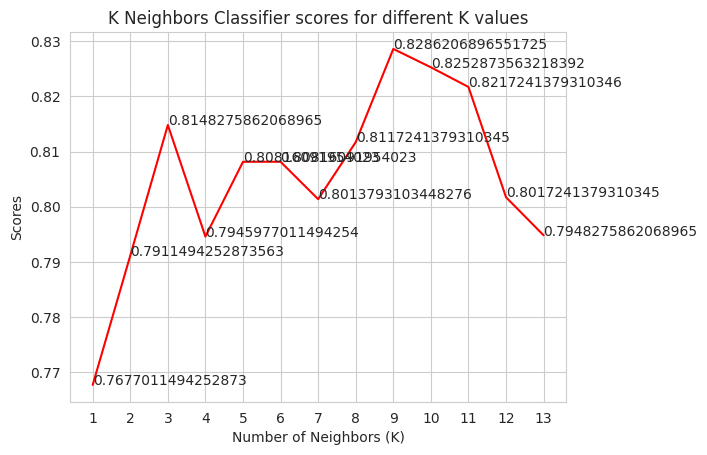

In [ ]:
plt.plot([k for k in range(1, 14)], knn_scores, color = 'red')

for i in range(1,14):
  plt.text(i, knn_scores[i-1], (knn_scores[i-1]))

plt.xticks([i for i in range(1,14)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier, X,y,cv=10)
knn_scores.append(score.mean())

In [ ]:
score.mean()

0.8017241379310345

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
randomforest_classifier = RandomForestClassifier(n_estimators=10)
score = cross_val_score(randomforest_classifier,X,y,cv=10)

In [ ]:
score.mean()

0.8112643678160921

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
resultados = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, resultados)

In [ ]:
score

0.7888888888888889

In [ ]:
rdf = RandomForestClassifier()

In [ ]:
rdf.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
resultados = rdf.predict(X_test)

In [ ]:
score = accuracy_score(Y_test, resultados)

In [ ]:
score

0.7888888888888889